## Variable selection 1: Distance Correlation

This notebook goes with the blog post: [Variable selection in Python, part I](https://mycarta.wordpress.com/2019/04/30/variable-selection-in-python-part-i/).

### Preliminaries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import dcor
import copy

### Data loading, dropping production

In [2]:
data = pd.read_csv('../data/Table2_Hunt_2013_edit.csv')

In [3]:
data = data.loc[:, ['Position', 'Gross pay', 'Phi-h', 'Pressure', 'Random 1', 'Random 2', 'Gross pay transform']]
data.describe()

,Position,Gross pay,Phi-h,Pressure,Random 1,Random 2,Gross pay transform
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,1.885714,9.823810,68.880952,15.285714,10.190476,292.714286,16.579524
std,0.708721,5.948521,45.167894,2.759400,6.439092,59.429069,6.543793
min,1.000000,0.100000,0.500000,10.000000,1.000000,210.000000,3.540000
25%,1.100000,4.900000,24.600000,14.000000,6.000000,245.000000,11.520000
50%,2.000000,10.000000,72.900000,16.000000,10.000000,273.000000,16.900000
75%,2.200000,15.100000,100.000000,17.000000,13.000000,340.000000,21.970000
max,2.900000,19.100000,160.000000,20.000000,21.000000,395.000000,29.250000


### Correlation matrix using distance correlation and p-value, reordered after clustering

In [4]:
def dist_corr(X, Y, pval=True, nruns=2000):
    """ Distance correlation with p-value from bootstrapping
    """
    dc = dcor.distance_correlation(X, Y)
    pv = dcor.independence.distance_covariance_test(X, Y, exponent=1.0, num_resamples=nruns)[0]

    if pval:
        return (dc, pv)
    else:
        return dc

In [5]:
def corrfunc(x, y, **kws):
    d, p = dist_corr(x,y) 
    ax = plt.gca()
    ax.annotate("DC = {:.2f}".format(d), xy=(.1, 0.99), xycoords=ax.transAxes, color = 'Darkblue', fontsize = 14)

In [6]:
data.rename(index=str, columns={"Gross pay tr": "Gross pay transform"}, inplace=True)
distcorr = lambda column1, column2: dcor.distance_correlation(column1, column2)
rslt = data.apply(lambda col1: data.apply(lambda col2: distcorr(col1, col2)))
pd.options.display.float_format = '{:,.2f}'.format
rslt

,Position,Gross pay,Phi-h,Pressure,Random 1,Random 2,Gross pay transform
Position,1.00,0.28,0.32,0.22,0.32,0.54,0.23
Gross pay,0.28,1.00,0.89,0.34,0.32,0.45,0.97
Phi-h,0.32,0.89,1.00,0.27,0.35,0.54,0.83
Pressure,0.22,0.34,0.27,1.00,0.27,0.31,0.38
Random 1,0.32,0.32,0.35,0.27,1.00,0.23,0.35
Random 2,0.54,0.45,0.54,0.31,0.23,1.00,0.39
Gross pay transform,0.23,0.97,0.83,0.38,0.35,0.39,1.00


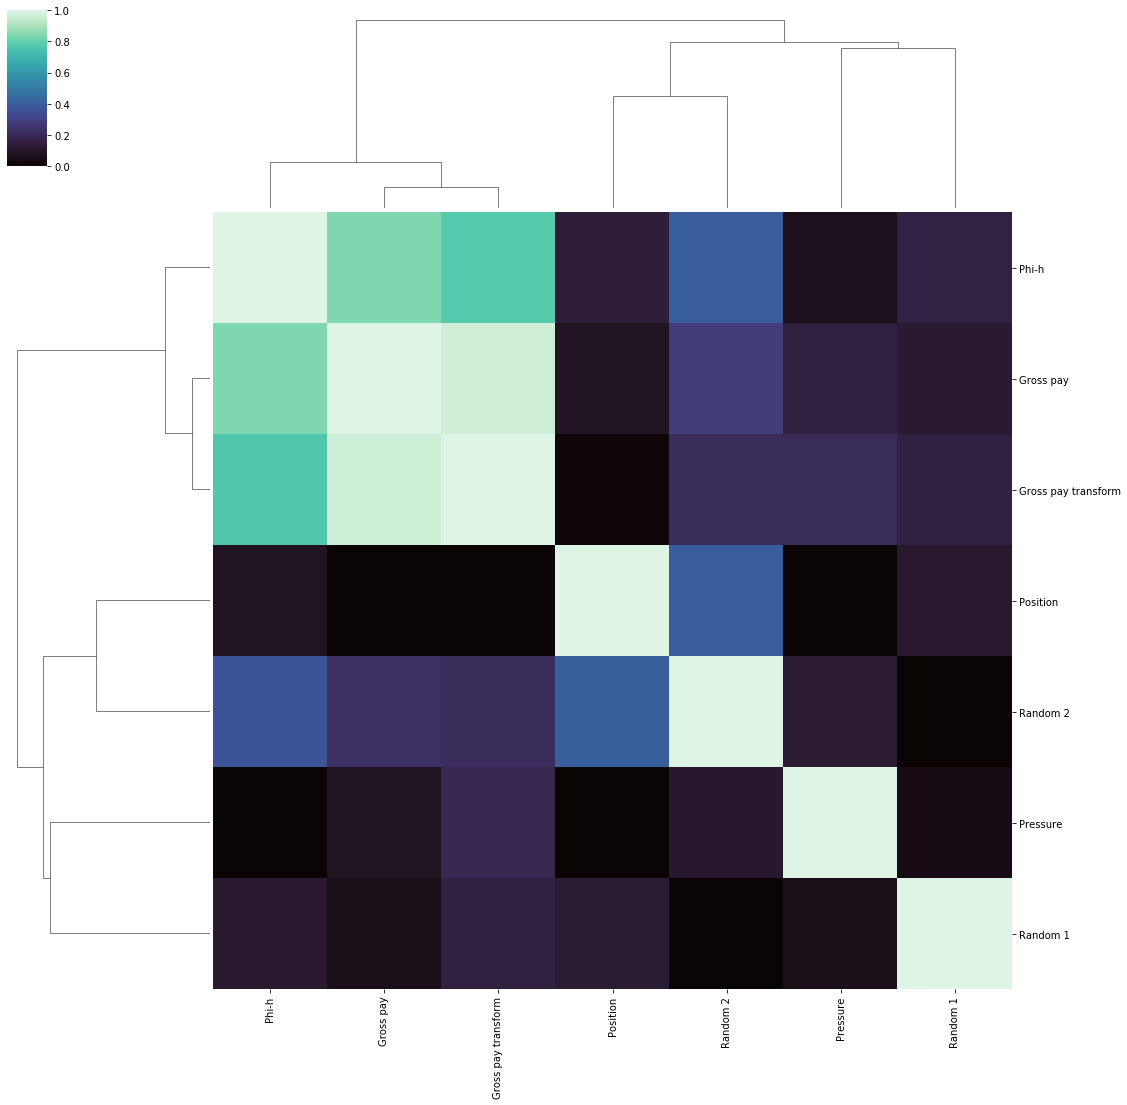

In [7]:
g = sns.clustermap(rslt, cmap="mako", standard_scale=1)
fig = plt.gcf()
fig.set_size_inches(18, 18)
plt.gcf().get_axes()[2].set_ylim(rslt.shape[0]-0.01, -0.01)
plt.show()

In [8]:
a = g.dendrogram_col.reordered_ind
b = list(data)
data = data[[b[i] for i in a]]

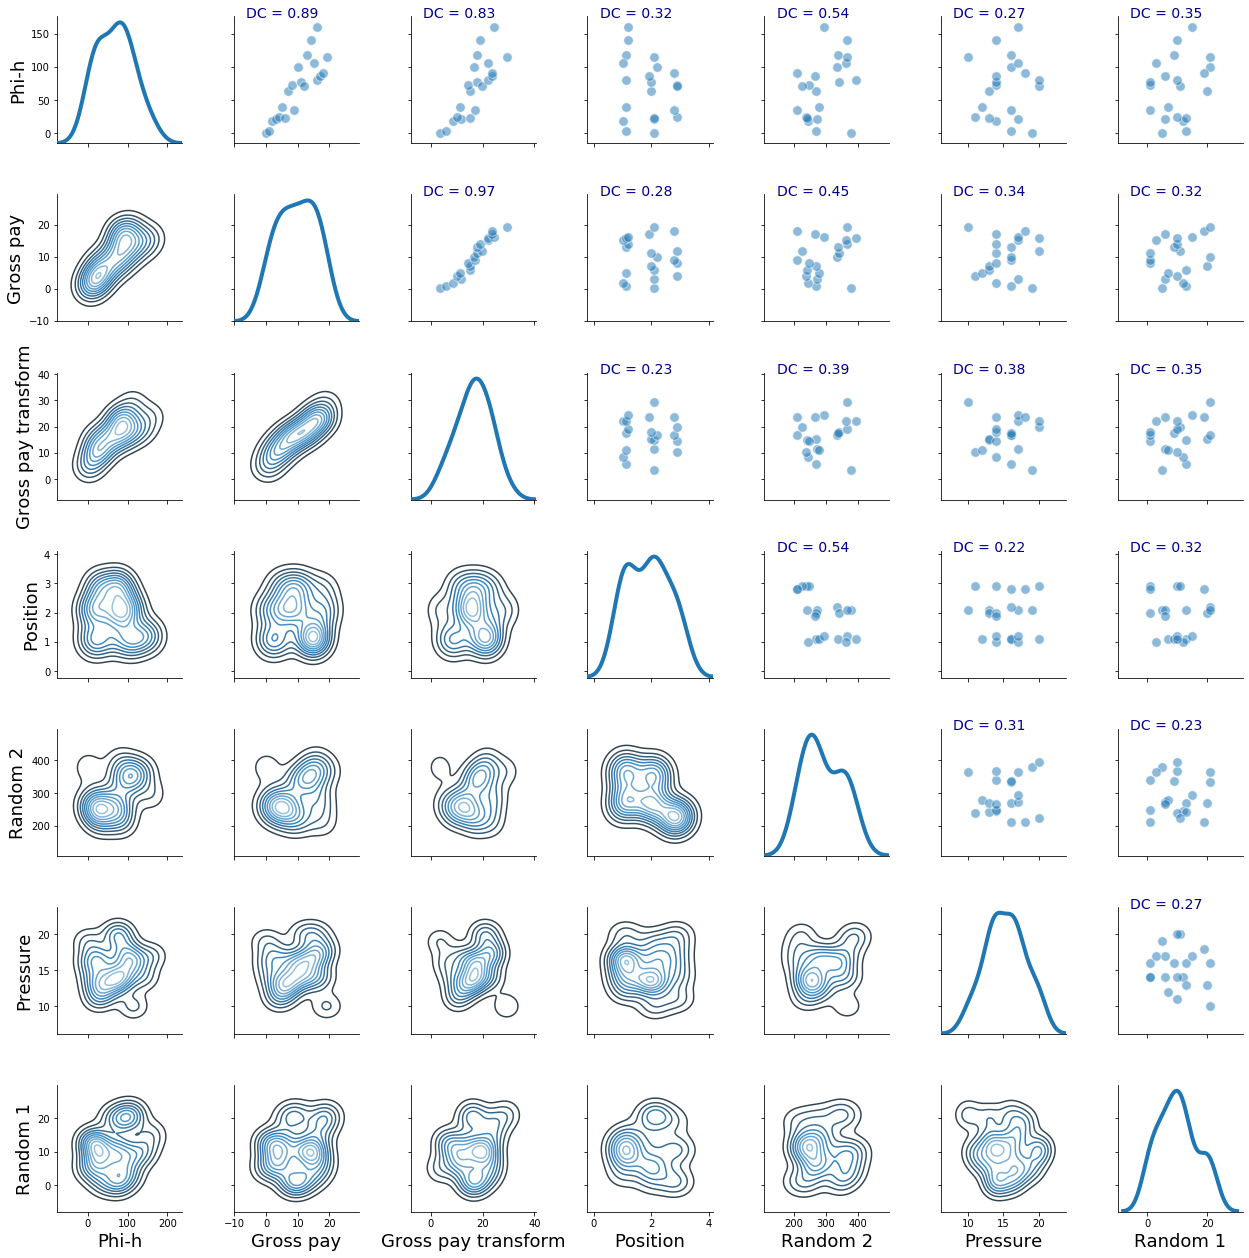

In [9]:
plt.rcParams["axes.labelsize"] = 18
g = sns.PairGrid(data, diag_sharey=False)
axes = g.axes

g.map_upper(plt.scatter, linewidths=1, edgecolor="w", s=90, alpha = 0.5)
g.map_upper(corrfunc)

g.map_diag(sns.kdeplot, lw = 4, legend=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")

#plt.savefig('matrix_sorted.png', dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()